In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import sys
import random 
from cv2 import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import utils # from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

/home/zed/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zed/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zed/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zed/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [63]:
model = None

In [4]:
dataset_path = "mntram/dataset"

In [5]:
train = []
validation = []

In [64]:
def init_model():
    global model

    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(39, activation='softmax'))

    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

init_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 128)        

In [66]:
def import_dataset():
    # Load Train Dataset
    for letter in os.listdir(os.path.join(dataset_path, "Train")):
        print(f"Train Dataset: Loading Letter {letter}")
        for image_path in os.listdir(os.path.join(dataset_path, "Train", letter)):
            img = cv2.imread(os.path.join(dataset_path, "Train", letter, image_path), 0)
            img = cv2.resize(img,(32,32))
            train.append((img, letter))

    # Load Validation Dataset
    for letter in os.listdir(os.path.join(dataset_path, "Validation")):
        print(f"Validation Dataset: Loading Letter {letter}")
        for image_path in os.listdir(os.path.join(dataset_path, "Validation", letter)):
            img = cv2.imread(os.path.join(dataset_path, "Validation", letter, image_path), 0)
            img = cv2.resize(img,(32,32))
            validation.append((img, letter))

    print("Shuffling")
    random.shuffle(train)
    random.shuffle(validation)

In [74]:
def save_model(path):
    # tf.keras.models.save_model(model, path, overwrite=True, include_optimizer=True, save_format='h5py')
    model.save(path)

def load_model(path):
    global model
    # model = tf.keras.models.load_model(path, custom_objects=None, compile=True)
    model = tf.keras.models.load_model(path)

# load_model("models/model_1_3e_quarter.mdl")
# save_model("models/model_3_10e_all.mdl")

In [67]:
# def train_model():
if model == None:
    init_model()
if train == []:
    import_dataset()

train_X = [x[0] for x in train[:int(len(train))]]
train_Y = [x[1] for x in train[:int(len(train))]]

val_X = [x[0] for x in validation[:int(len(validation))]]
val_Y = [x[1] for x in validation[:int(len(validation))]]

#LB
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

    
history = model.fit(train_X,train_Y, epochs=10, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)



# train_model()

Train on 834036 samples, validate on 22524 samples
Epoch 1/10
834036/834036 [==============================] - 537s 644us/sample - loss: 0.2895 - acc: 0.9081 - val_loss: 0.1885 - val_acc: 0.9410
Epoch 2/10
834036/834036 [==============================] - 536s 642us/sample - loss: 0.1993 - acc: 0.9346 - val_loss: 0.1944 - val_acc: 0.9380
Epoch 3/10
834036/834036 [==============================] - 524s 628us/sample - loss: 0.1881 - acc: 0.9378 - val_loss: 0.1718 - val_acc: 0.9464
Epoch 4/10
834036/834036 [==============================] - 519s 622us/sample - loss: 0.1834 - acc: 0.9391 - val_loss: 0.1771 - val_acc: 0.9475
Epoch 5/10
834036/834036 [==============================] - 540s 648us/sample - loss: 0.1809 - acc: 0.9399 - val_loss: 0.1713 - val_acc: 0.9490
Epoch 6/10
834036/834036 [==============================] - 552s 661us/sample - loss: 0.1796 - acc: 0.9405 - val_loss: 0.1717 - val_acc: 0.9477
Epoch 7/10
834036/834036 [==============================] - 551s 660us/sample - loss:

In [54]:
def takeSecond(elem):
    return elem[1]

def split_by_letter(img):
    cropped_imgs = []
    ret,thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)

    # for c in contours:
    #     (x, y, w, h) = cv2.boundingRect(c)
    #     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # plt.imshow(img)

    # print(contours)

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cropped = img[y-5:y+h+5, x-5:x+w+5]
        if cropped.size <= 5:
            continue
        cropped_imgs.append((cropped, x))

    cropped_imgs.sort(key=takeSecond)

    return [x[0] for x in cropped_imgs]


L@@@1D@@D@@


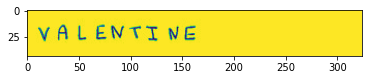

In [73]:
def eval_letter(float_img):
    ypred = model.predict(float_img)
    ypred = LB.inverse_transform(ypred)
    return ypred[0]

def evaluate(imgpath, single_letter=False):
    image = cv2.imread(imgpath, 0)

    if single_letter:
        resized = cv2.resize(image, (32, 32)) #interpolation = cv2.INTER_CUBIC

        resized = resized.astype("float32") / 255.0
        resized = resized.reshape(1,32,32,1)
        
        print(eval_letter(resized))

    cropped = split_by_letter(image)

    output = []

    for i in cropped:
        formatted = cv2.resize(i, (32, 32), interpolation = cv2.INTER_CUBIC)
        formatted = formatted.astype("float32") / 255.0
        formatted = formatted.reshape(1,32,32,1)
        output.append(eval_letter(formatted))

    plt.imshow(image)
    print("".join(output))

    

# evaluate("mntram/dataset/Validation/R/_1_73.jpg", single_letter=False)
# evaluate("hello-modified.jpg", single_letter=False)
# evaluate("TRAIN_00003.jpg", single_letter=False)
evaluate("TEST_0007.jpg", single_letter=False)

In [12]:
def main():
    if len(sys.argv) < 2:
        print("Use command line argument")
        exit(0)

    if sys.argv[1].lower() == "train":
        train_model()
    elif sys.argv[1].lower() == "eval":
        evaluate()
    else:
        print("Command not recognized")
        exit(0)

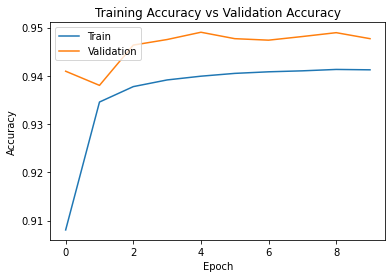

In [69]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

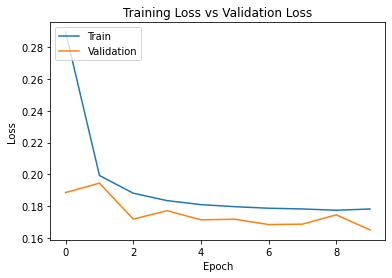

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()